# Fashion-Images Classification

## Introduction
Fashion-MNIST is a dataset of Zalando’s fashion article images — consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each instance is a 28×28 grayscale image, associated with a label. This dataset is created to classify different fashion images.

## Preprocessing Data

### Importing Data

In [4]:
import pandas as pd

train = pd.read_csv("/content/drive/MyDrive/Datasets/Fashion-MNIST/fashion-mnist_train.csv")
test = pd.read_csv("/content/drive/MyDrive/Datasets/Fashion-MNIST/fashion-mnist_test.csv")

In [5]:
train.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,6,2,0,0,0,0,0,0,0,2,3,7,4,4,5,5,0,0,0,0,0,0,4,5,4,5,11,2,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,2,4,9,7,8,7,5,4,8,12,5,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,0,0,0,159,161,143,180,142,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,...,255,231,241,217,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,36,50,51,68,48,48,33,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,0,60,234,215,229,223,231,107,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,224,...,0,0,0,2,0,77,210,204,156,0,0,0,0,0,0,1,76,88,35,0,0,2,5,7,3,3,3,3,7,5,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,0,0,1,0,0,141,45,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,238,229,227,223,255,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,220,215,210,198,185,188,194,177,189,198,203,214,166,0,0,0,0,0,0,0


In [6]:
test.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,...,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,...,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,...,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,...,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,44,105,44,10,0,0,0,0,0,0,0,0,0,0,0,34,68,34,0,0,0,0,0,0,0,0,0,34,136,102,105,98,74,64,...,129,122,125,139,132,132,10,0,0,0,0,0,0,0,0,0,0,0,0,23,57,105,108,115,125,125,122,122,125,119,105,64,30,0,0,0,0,0,0,0
6,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,6,0,0,0,0,0,0,0,1,0,0,0,108,25,0,0,0,132,54,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,11,61,102,...,146,196,197,136,215,42,0,3,0,0,0,0,0,0,0,0,0,0,1,0,82,172,159,150,140,142,164,160,153,202,174,136,155,31,0,1,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,75,192,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,92,66,0,0,0,0,81,91,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27,75,111,118,...,121,117,104,110,69,0,0,1,0,0,0,0,0,0,0,0,0,0,0,49,63,52,55,57,57,55,53,53,55,61,57,70,28,0,2,0,0,0,0,0


### Reshaping and Normalizing the Data

In [7]:
# Train Data
X = train.drop('label', axis = 1)
y = train['label'].values
X = X.astype('float32') / 255.0
X = X.values.reshape(-1, 28, 28, 1)

# Test Data
X_test = test.drop('label', axis = 1)
y_test = test['label'].values
X_test = X_test.astype('float32') / 255.0
X_test = X_test.values.reshape(-1, 28, 28, 1)

print(X_test.shape, y_test.shape)

(10000, 28, 28, 1) (10000,)


### Viewing our Data

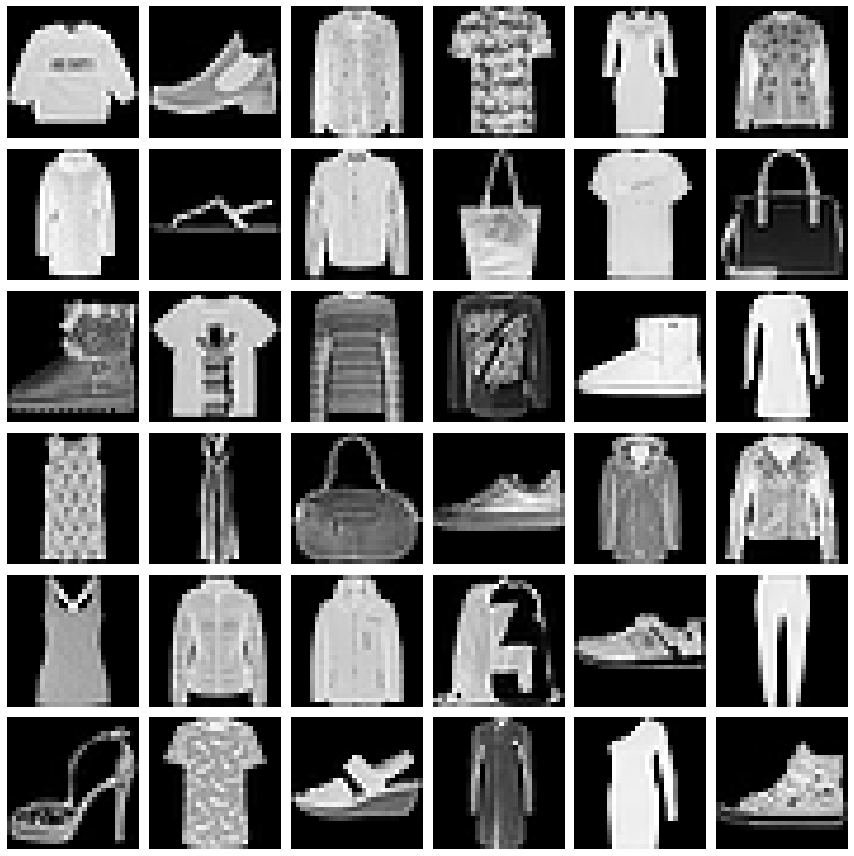

In [64]:
import matplotlib.pyplot as plt
import numpy as np

labels_list = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(12,12))

for i in range(0, 36):
    plt.subplot(6,6,i + 1)
    plt.imshow(np.squeeze(X[i]), cmap=plt.get_cmap('gray'))
    plt.axis("off")

plt.tight_layout()

plt.show()

### OneHotEncoding the Data

In [23]:
import tensorflow as tf

y = tf.keras.utils.to_categorical(y, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

### Splitting the Train Data into Training Data and Validation Data

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(48000, 28, 28, 1) (12000, 28, 28, 1) (48000, 10) (12000, 10)


## Model

### Callbacks

In [25]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(monitor="val_accuracy",
                  min_delta=1e-4,
                  patience=5,
                  restore_best_weights=True)
]

### Building the Model

In [32]:
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same', input_shape=(28,28,1)),
  tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same'),
  tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same'),
  tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
  tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(10, activation='softmax')
])

### Model Summary

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_16 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_17 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)       

### Model Architecutre

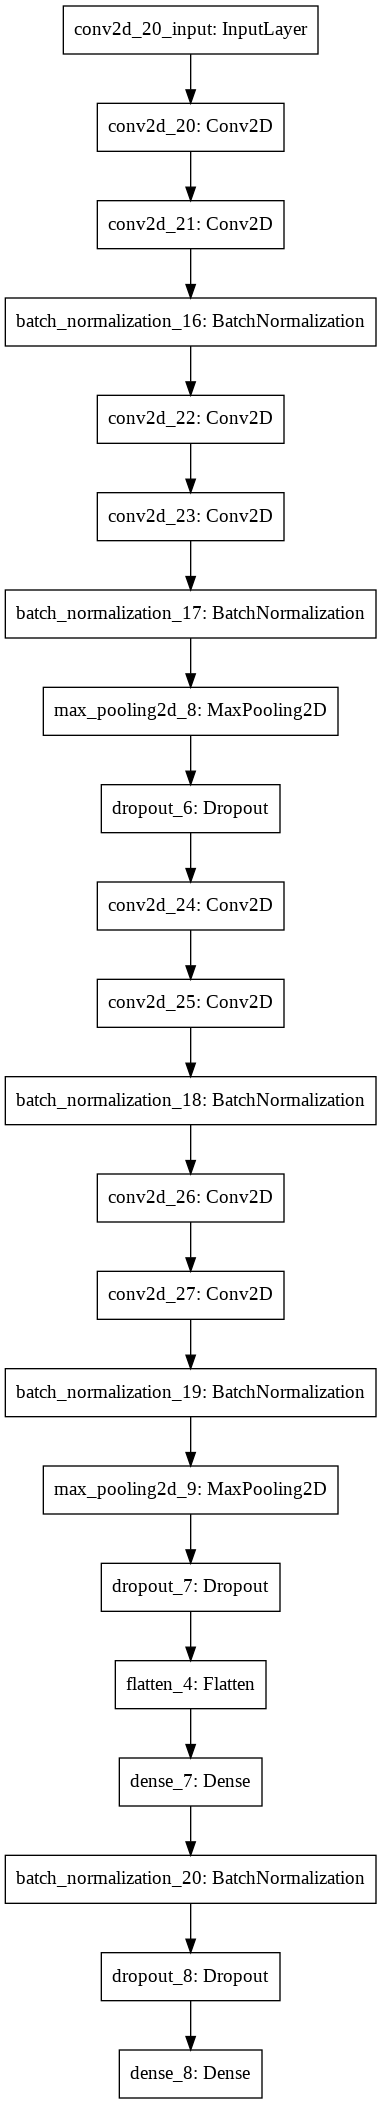

In [34]:
tf.keras.utils.plot_model(model)

### Compiling the Model

In [35]:
model.compile(loss = tf.keras.losses.categorical_crossentropy,
              optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4),
              metrics = ['accuracy'])

### Fitting the Model

In [36]:
history = model.fit(X_train, y_train,
                    epochs=200, batch_size=64,
                    validation_data = (X_val, y_val),
                    callbacks=callbacks)

Epoch 1/200
750/750 [==============================] - 24s 31ms/step - loss: 0.6613 - accuracy: 0.7693 - val_loss: 0.3713 - val_accuracy: 0.8676
Epoch 2/200
750/750 [==============================] - 22s 30ms/step - loss: 0.4133 - accuracy: 0.8500 - val_loss: 0.2953 - val_accuracy: 0.8942
Epoch 3/200
750/750 [==============================] - 22s 30ms/step - loss: 0.3447 - accuracy: 0.8760 - val_loss: 0.2861 - val_accuracy: 0.8959
Epoch 4/200
750/750 [==============================] - 22s 30ms/step - loss: 0.3009 - accuracy: 0.8903 - val_loss: 0.2511 - val_accuracy: 0.9095
Epoch 5/200
750/750 [==============================] - 22s 30ms/step - loss: 0.2747 - accuracy: 0.8992 - val_loss: 0.2310 - val_accuracy: 0.9172
Epoch 6/200
750/750 [==============================] - 22s 30ms/step - loss: 0.2526 - accuracy: 0.9074 - val_loss: 0.2268 - val_accuracy: 0.9180
Epoch 7/200
750/750 [==============================] - 22s 30ms/step - loss: 0.2361 - accuracy: 0.9142 - val_loss: 0.2234 - val_ac

### Evaluating with test data

In [38]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.1891 - accuracy: 0.9387


[0.1890580952167511, 0.9387000203132629]